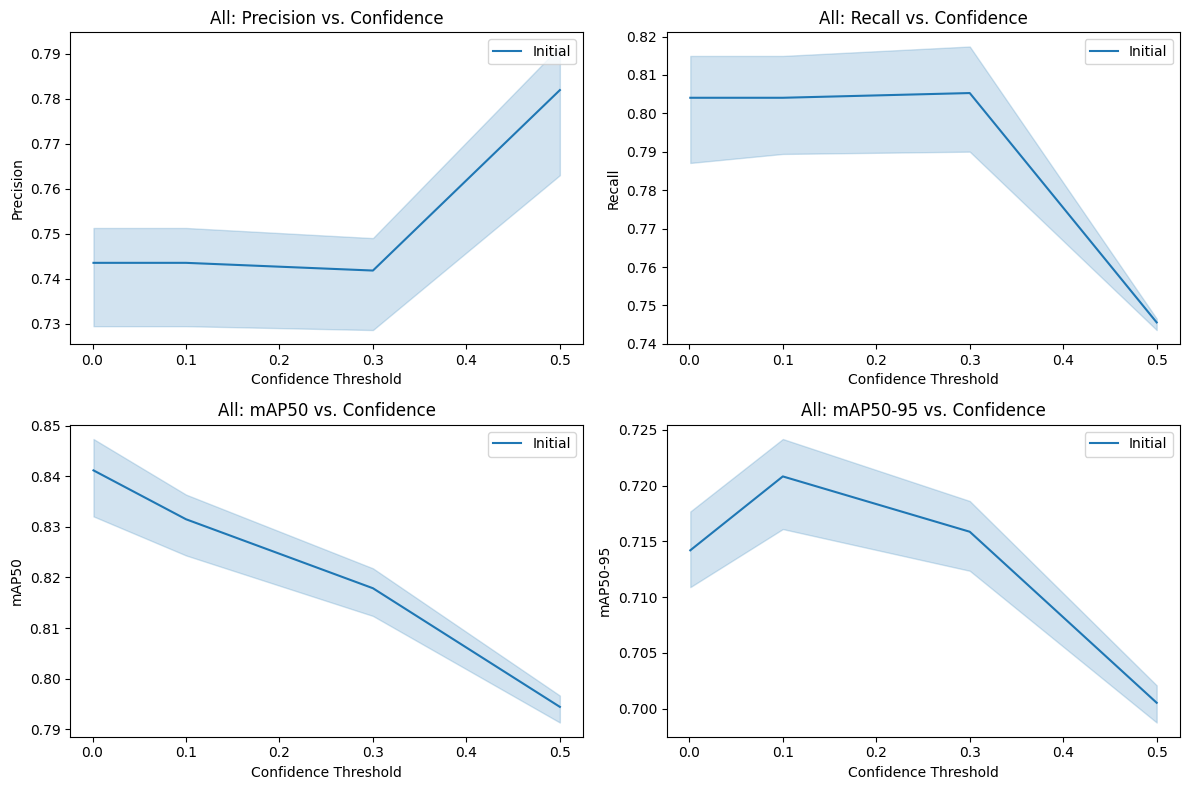

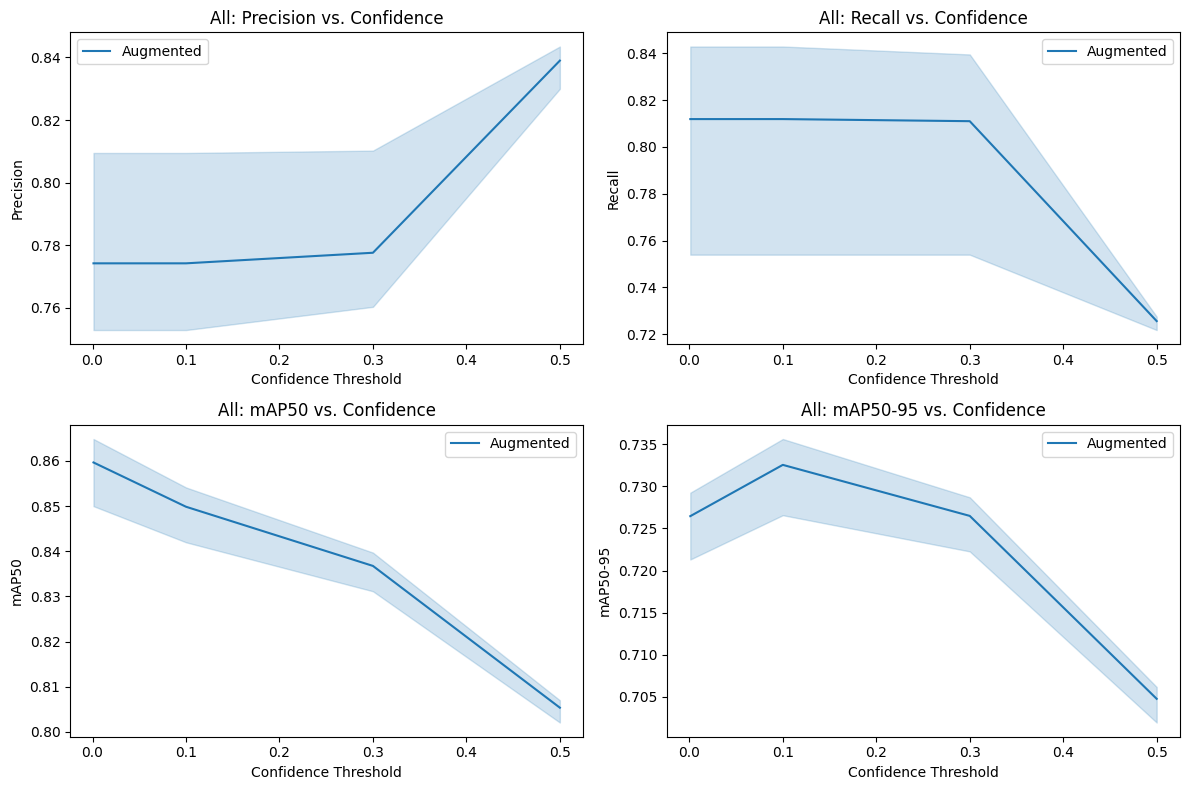

ValueError: Could not interpret value `p` for `y`. An entry with this name does not appear in `data`.

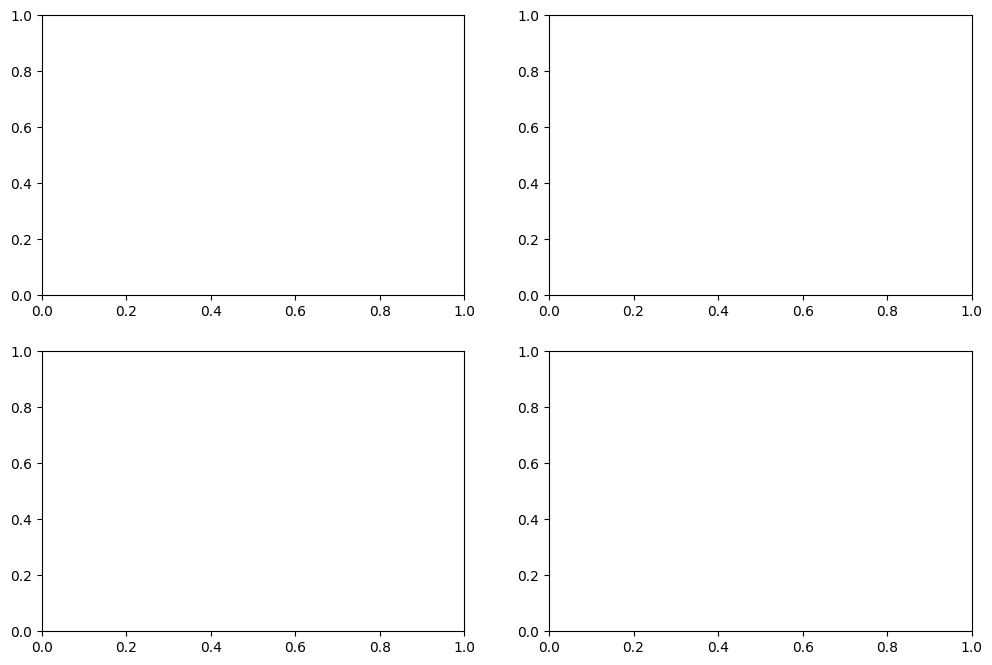

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and visualize metrics
def visualize_metrics(file_path, class_name='All', model_name='Initial'):
    """
    Loads the metrics from a CSV file and creates visualizations.

    Args:
        file_path: Path to the CSV file containing the metrics.
        class_name: Name of the class (e.g., 'All', 'c', 's', 'v').
        model_name: Name of the model ('Initial' or 'Augmented').
    """
    df = pd.read_csv(file_path)

    # Create subplots for different metrics
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Precision vs. Confidence
    sns.lineplot(x='conf', y='p', data=df, ax=axes[0, 0], label=model_name)
    axes[0, 0].set_title(f'{class_name}: Precision vs. Confidence')
    axes[0, 0].set_xlabel('Confidence Threshold')
    axes[0, 0].set_ylabel('Precision')

    # Recall vs. Confidence
    sns.lineplot(x='conf', y='r', data=df, ax=axes[0, 1], label=model_name)
    axes[0, 1].set_title(f'{class_name}: Recall vs. Confidence')
    axes[0, 1].set_xlabel('Confidence Threshold')
    axes[0, 1].set_ylabel('Recall')

    # mAP50 vs. Confidence
    sns.lineplot(x='conf', y='map50', data=df, ax=axes[1, 0], label=model_name)
    axes[1, 0].set_title(f'{class_name}: mAP50 vs. Confidence')
    axes[1, 0].set_xlabel('Confidence Threshold')
    axes[1, 0].set_ylabel('mAP50')

    # mAP50-95 vs. Confidence
    sns.lineplot(x='conf', y='map50-95', data=df, ax=axes[1, 1], label=model_name)
    axes[1, 1].set_title(f'{class_name}: mAP50-95 vs. Confidence')
    axes[1, 1].set_xlabel('Confidence Threshold')
    axes[1, 1].set_ylabel('mAP50-95')

    plt.tight_layout()
    plt.show()

# Visualize metrics for each class and overall for both models
for class_name, file_name in zip(['All', 'c', 's', 'v'], ['metrics_all', 'metrics_c', 'metrics_s', 'metrics_v']):
    initial_file_path = f'./initial_results/{file_name}.csv'
    augmented_file_path = f'./augmented_results/{file_name}.csv'

    visualize_metrics(initial_file_path, class_name, 'Initial')
    visualize_metrics(augmented_file_path, class_name, 'Augmented')